<a href="https://colab.research.google.com/github/marudengi/practice-for-kaggle/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Files**

In [4]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seongsoohyeon","key":"6a52675cdb2f4ee3e2c1cb05a44ea6b7"}'}

In [11]:
ls

kaggle.json  sample_data/


In [12]:
ls -1ha kaggle.json

kaggle.json


In [22]:
!mkdir -p ./kaggle
!cp kaggle.json ./kaggle/

In [26]:
pwd

'/content'

In [29]:
cd ..

/content


In [30]:
!chmod 600 ./kaggle/kaggle.json

In [31]:
pwd

'/content'

In [32]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         91           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        197           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        449           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3053           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      24450            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6050            True  
connectx

In [33]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.1MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.5MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 59.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.8MB/s]


In [34]:
!ls

data_description.txt  kaggle.json  sample_submission.csv  train.csv
kaggle		      sample_data  test.csv


# **1. Import**

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline

1.  **Import Dataset & Preprocessing**



In [144]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [37]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [38]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
y_train = train['SalePrice']
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
X_train = train.loc[:,:'SaleCondition']
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Un

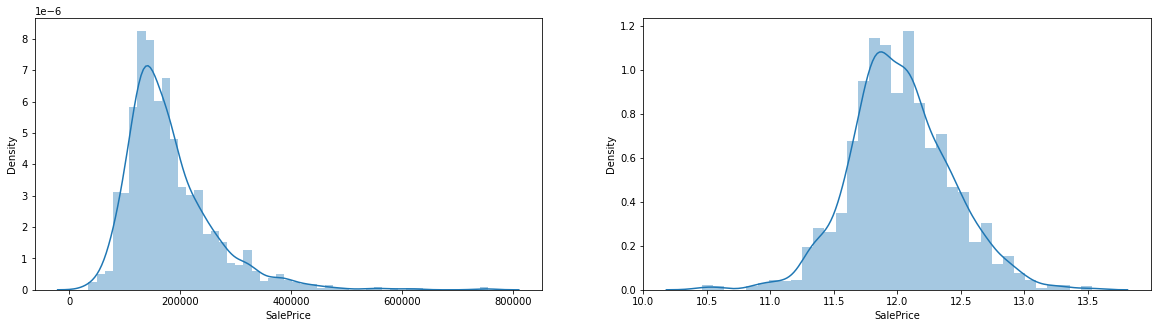

In [41]:
f, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train['SalePrice'],ax=ax[0])
sns.distplot(np.log(train['SalePrice']), ax=ax[1])
plt.show()

continuous target data can be converted by log data

# **2. Fill NA**

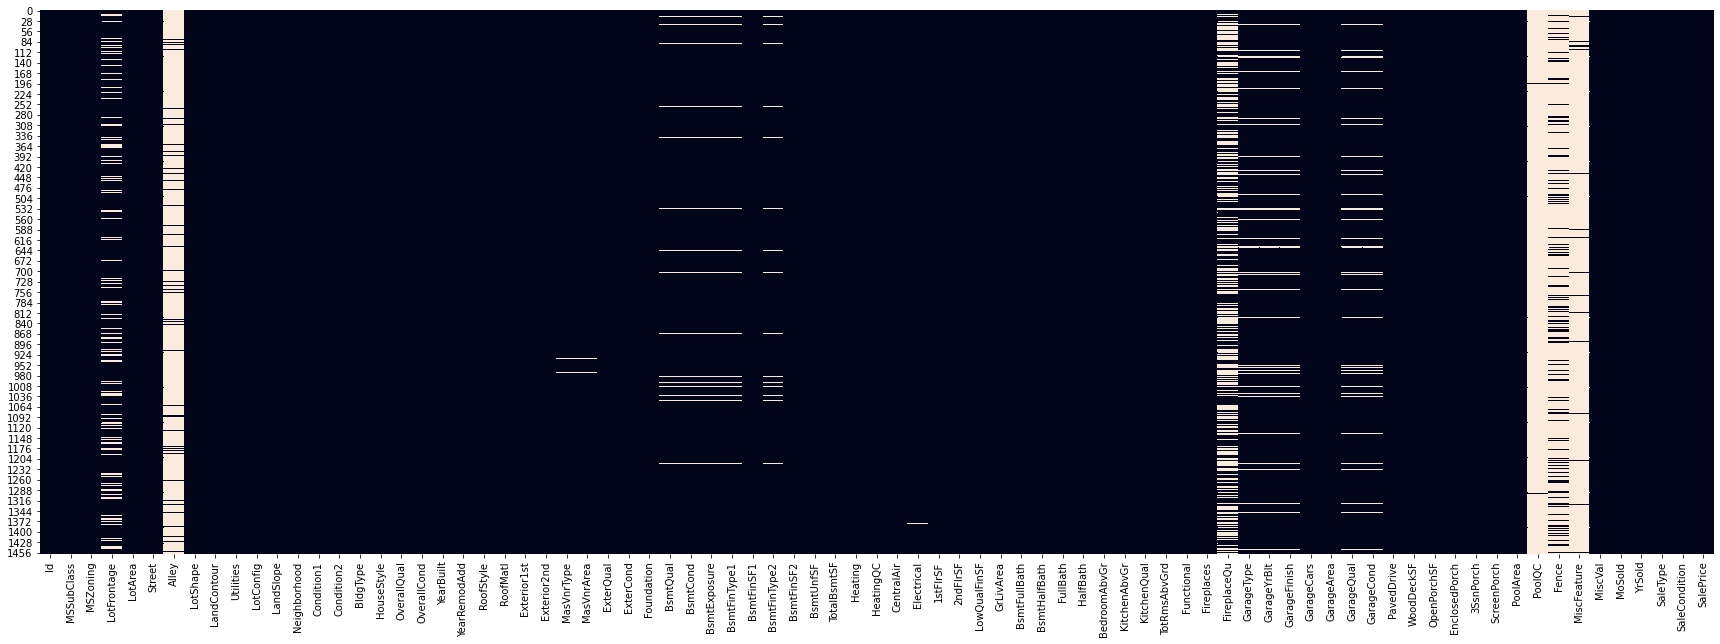

In [42]:
#uniform_data = np.random.rand(train.index.shape[0],train.columns.shape[0])
f, ax = plt.subplots(1,1,figsize=(30,10))
sns.heatmap(train.isnull(),cbar=False)
plt.show()

Missing values : LotFrontage, Alley, 

MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFinType2, 

Electrical,

FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, 

PoolQC, Fence, MiscFeature

In [43]:
def Nasum(df):
  for idx, col in enumerate(df):

    print('{0: >13} {1}'.format(col, df[col].isnull().sum()))

In [44]:
Nasum(train)

           Id 0
   MSSubClass 0
     MSZoning 0
  LotFrontage 259
      LotArea 0
       Street 0
        Alley 1369
     LotShape 0
  LandContour 0
    Utilities 0
    LotConfig 0
    LandSlope 0
 Neighborhood 0
   Condition1 0
   Condition2 0
     BldgType 0
   HouseStyle 0
  OverallQual 0
  OverallCond 0
    YearBuilt 0
 YearRemodAdd 0
    RoofStyle 0
     RoofMatl 0
  Exterior1st 0
  Exterior2nd 0
   MasVnrType 8
   MasVnrArea 8
    ExterQual 0
    ExterCond 0
   Foundation 0
     BsmtQual 37
     BsmtCond 37
 BsmtExposure 38
 BsmtFinType1 37
   BsmtFinSF1 0
 BsmtFinType2 38
   BsmtFinSF2 0
    BsmtUnfSF 0
  TotalBsmtSF 0
      Heating 0
    HeatingQC 0
   CentralAir 0
   Electrical 1
     1stFlrSF 0
     2ndFlrSF 0
 LowQualFinSF 0
    GrLivArea 0
 BsmtFullBath 0
 BsmtHalfBath 0
     FullBath 0
     HalfBath 0
 BedroomAbvGr 0
 KitchenAbvGr 0
  KitchenQual 0
 TotRmsAbvGrd 0
   Functional 0
   Fireplaces 0
  FireplaceQu 690
   GarageType 81
  GarageYrBlt 81
 GarageFinish 81
   Garage

# **LotFrontage**
with LotArea

In [157]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

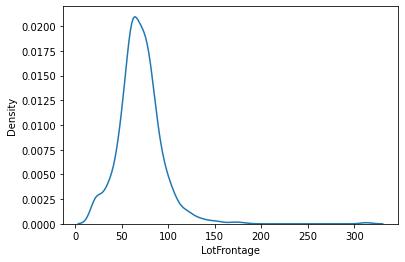

In [134]:
f,ax =plt.subplots()
sns.kdeplot(train['LotFrontage'])

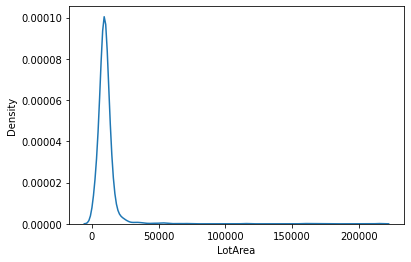

In [135]:
f,ax =plt.subplots()
sns.kdeplot(train['LotArea'])

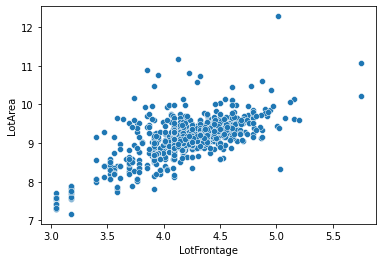

In [102]:
f, ax = plt.subplots()
sns.scatterplot(np.log(train['LotFrontage']),np.log(train['LotArea']))
plt.show()

In [191]:
train = pd.read_csv('train.csv')

In [197]:
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [192]:
math.e**np.log(train['LotArea']/130)

0        65.000000
1        73.846154
2        86.538462
3        73.461538
4       109.692308
           ...    
1455     60.900000
1456    101.346154
1457     69.553846
1458     74.746154
1459     76.438462
Name: LotArea, Length: 1460, dtype: float64

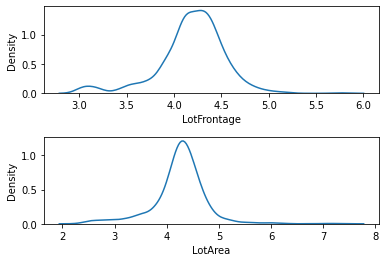

In [193]:
f, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
sns.kdeplot(np.log(train['LotFrontage']),ax=ax[0])
sns.kdeplot(np.log(train['LotArea']/130),ax=ax[1])
plt.show()

LotFrontage and LotArea have a similar relationship

In [194]:
for idx, val in enumerate(train['LotFrontage']):
  if math.isnan(val):
    train.loc[idx,'LotFrontage'] = math.e**np.log(train.loc[idx,'LotArea']/130)

In [195]:
train['LotFrontage'].isna().sum()

0

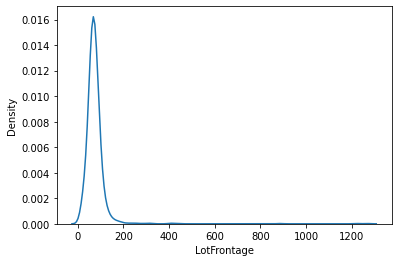

In [196]:
f, ax = plt.subplots()
sns.kdeplot(train['LotFrontage'])
plt.show()

# **Alley**
with street

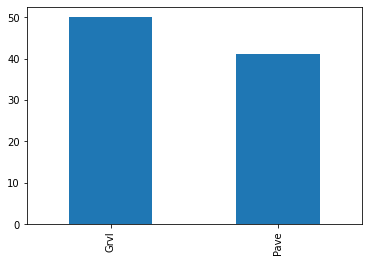

In [188]:
train['Alley'].value_counts().plot.bar()
plt.show()

In [213]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [206]:
train.loc[:,['Alley','Street']].value_counts()

Alley  Street
Grvl   Pave      50
Pave   Pave      41
dtype: int64

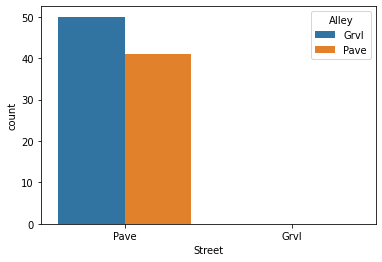

In [212]:
f, ax = plt.subplots()
sns.countplot(train['Street'],hue=train['Alley'])

Most of street is Pave

In [216]:
train['Alley'].fillna('Pave',inplace = True)

In [217]:
train['Alley'].isna().sum()

0

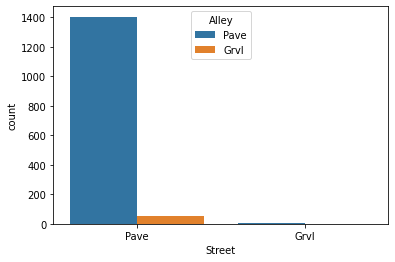

In [218]:
f, ax = plt.subplots()
sns.countplot(train['Street'],hue=train['Alley'])

# **MasVnrType and MasVnrArea**

In [219]:
train['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [228]:
train['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [229]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [230]:
train['MasVnrType'].isna().sum()

8

In [251]:
for idx, val in enumerate(train['MasVnrType']):
  if str(val) == 'nan':
    print(idx, train.loc[idx,'Exterior1st'])

234 VinylSd
529 Wd Sdng
650 CemntBd
936 VinylSd
973 CemntBd
977 VinylSd
1243 VinylSd
1278 VinylSd


In [222]:
train['Exterior1st']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
1455    VinylSd
1456    Plywood
1457    CemntBd
1458    MetalSd
1459    HdBoard
Name: Exterior1st, Length: 1460, dtype: object

In [273]:
train['Exterior1st'].groupby(train['MasVnrType']).value_counts()

MasVnrType  Exterior1st
BrkCmn      Wd Sdng          5
            HdBoard          3
            MetalSd          2
            VinylSd          2
            Plywood          1
            Stucco           1
            WdShing          1
BrkFace     VinylSd        177
            HdBoard        110
            MetalSd         58
            Plywood         43
            Wd Sdng         37
            CemntBd         12
            WdShing          4
            Stucco           3
            AsbShng          1
None        VinylSd        240
            Wd Sdng        162
            MetalSd        155
            HdBoard        102
            Plywood         61
            BrkFace         49
            CemntBd         30
            Stucco          20
            WdShing         20
            AsbShng         18
            BrkComm          2
            Stone            2
            AsphShn          1
            CBlock           1
            ImStucc          1
Stone       Vin

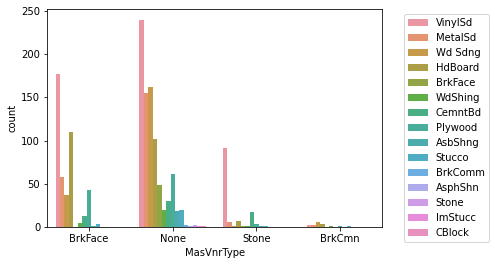

In [271]:
f, ax = plt.subplots()
sns.countplot(x = train['MasVnrType'], hue=train['Exterior1st'])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Most of materials are used in None(MasVnrType)

Filling nan to 'None' is comfortable Now but for reusability make a function for most used materials in MasVnrType -- (3/19 need to fix)

In [ ]:
def most_used_material(df,feature1,feature2):
  df[feature1]

In [227]:
train['Exterior2nd'].groupby(train['MasVnrType']).value_counts()

MasVnrType  Exterior2nd
BrkCmn      HdBoard          4
            Wd Sdng          4
            MetalSd          2
            VinylSd          2
            Plywood          1
            Stucco           1
            Wd Shng          1
BrkFace     VinylSd        176
            HdBoard        103
            MetalSd         55
            Plywood         51
            Wd Sdng         34
            CmentBd         11
            ImStucc          4
            Wd Shng          4
            Stucco           3
            AsphShn          2
            AsbShng          1
            Other            1
None        VinylSd        236
            Wd Sdng        158
            MetalSd        152
            HdBoard         93
            Plywood         85
            CmentBd         30
            Wd Shng         28
            BrkFace         25
            Stucco          21
            AsbShng         18
            Brk Cmn          7
            ImStucc          5
            Sto

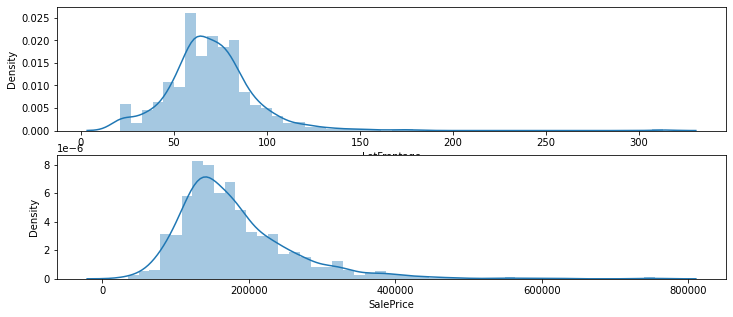

In [115]:
f, ax = plt.subplots(2,1,figsize=(12,5))
sns.distplot(train['LotFrontage'],ax=ax[0])
sns.distplot(train['SalePrice'],ax=ax[1])
plt.show()

In [ ]:
for idx, col in enumerate(train):
  empty_data = [Na for Na in train[col] if Na.isnull()]